<a href="https://colab.research.google.com/github/mmdrez4/ML_breast_cancer_survival/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Introduction to Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2022<br>
<font color=3C99D size=5>
    Project <br>
<font color=696880 size=4>
    Project Team 
    
    
____


# Introduction

In this project, we are going to have a brief and elementary hands-on real-world project, predicting breast cancer survival using machine learning models with clinical data and gene expression profiles.

# Data Documentation

For this purpose, we will use "Breast Cancer Gene Expression Profiles (METABRIC)" data. 
The first 31 columns of data contain clinical information including death status.
The next columns of the data contain gene's related information which includes both gene expressions and mutation information. (gene's mutation info columns have been marked with "_mut" at the end of the names of the columns) 
For more information please read the [data documentation](https://www.kaggle.com/datasets/raghadalharbi/breast-cancer-gene-expression-profiles-metabric).

# Data Preparation (15 Points)

In this section you must first split data into three datasets:
<br>
1- clinical dataset
<br>
2- gene expressions dataset
<br>
3- gene mutation dataset. (We will not use this dataset in further steps of the project)

## Data Loading & Splitting

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms, datasets

from tqdm import tqdm
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# TODO
df = pd.read_csv('METABRIC_RNA_Mutation.csv')
df.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (678,688,690,692) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_clinical = df.iloc[:,:31]
df_gene_expression = df.iloc[:,31:520]
df_gene_mutation = df.iloc[:,520:]

In [ ]:
df_clinical

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,7295,43.10,BREAST CONSERVING,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,LumA,4.0,Positve,...,5.050,ILC,196.866667,1,Positive,1,ER+/HER2- Low Prolif,25.0,NaN,Living
1900,7296,42.88,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,5.040,IDC,44.733333,0,Negative,1,NaN,20.0,NaN,Died of Disease
1901,7297,62.90,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,6.050,IDC,175.966667,0,Positive,1,NaN,25.0,NaN,Died of Disease
1902,7298,61.16,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,4.0,Positve,...,5.050,IDC,86.233333,0,Positive,0,ER+/HER2- High Prolif,25.0,NaN,Died of Other Causes


## EDA

For each dataset, you must perform a sufficient EDA.

### <font color='GoldenRod'>**EDA for clinical dataset**</font> 

In [ ]:
# For clinical
df_clinical.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [ ]:
df_clinical.shape

(1904, 31)

We are going to predict overall_survival. So we drop that and death_from_cancer because they are kind of the same!

In [ ]:
df_clinical = df_clinical.drop('overall_survival', axis=1)
df_clinical = df_clinical.drop('death_from_cancer', axis=1)

In [ ]:
df_clinical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   patient_id                      1904 non-null   int64  
 1   age_at_diagnosis                1904 non-null   float64
 2   type_of_breast_surgery          1882 non-null   object 
 3   cancer_type                     1904 non-null   object 
 4   cancer_type_detailed            1889 non-null   object 
 5   cellularity                     1850 non-null   object 
 6   chemotherapy                    1904 non-null   int64  
 7   pam50_+_claudin-low_subtype     1904 non-null   object 
 8   cohort                          1904 non-null   float64
 9   er_status_measured_by_ihc       1874 non-null   object 
 10  er_status                       1904 non-null   object 
 11  neoplasm_histologic_grade       1832 non-null   float64
 12  her2_status_measured_by_snp6    19

We can see that there are several null data in df_clinical.

In [ ]:
df_clinical.describe()

,patient_id,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,radio_therapy,tumor_size,tumor_stage
count,1904.000000,1904.000000,1904.000000,1904.000000,1832.000000,1904.000000,1904.000000,1859.000000,1904.000000,1904.000000,1904.000000,1884.000000,1403.000000
mean,3921.982143,61.087054,0.207983,2.643908,2.415939,0.616597,2.002101,5.697687,4.033019,125.121324,0.597164,26.238726,1.750535
std,2358.478332,12.978711,0.405971,1.228615,0.650612,0.486343,4.079993,4.058778,1.144492,76.334148,0.490597,15.160976,0.628999
min,0.000000,21.930000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,896.500000,51.375000,0.000000,1.000000,2.000000,0.000000,0.000000,3.000000,3.046000,60.825000,0.000000,17.000000,1.000000
50%,4730.500000,61.770000,0.000000,3.000000,3.000000,1.000000,0.000000,5.000000,4.042000,115.616667,1.000000,23.000000,2.000000
75%,5536.250000,70.592500,0.000000,3.000000,3.000000,1.000000,2.000000,7.000000,5.040250,184.716667,1.000000,30.000000,2.000000
max,7299.000000,96.290000,1.000000,5.000000,3.000000,1.000000,45.000000,80.000000,6.360000,355.200000,1.000000,182.000000,4.000000


Visualizing to check if there are any missing values.

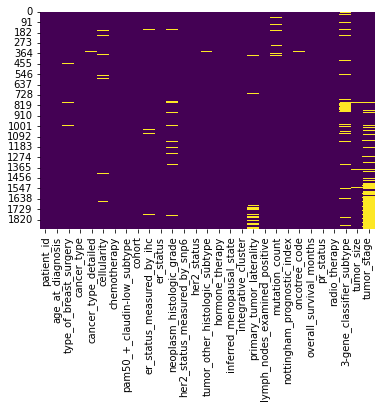

In [ ]:
sns.heatmap(df_clinical.isnull(),cbar=False,cmap='viridis')

In [ ]:
df_clinical.isnull().sum()

patient_id                          0
age_at_diagnosis                    0
type_of_breast_surgery             22
cancer_type                         0
cancer_type_detailed               15
cellularity                        54
chemotherapy                        0
pam50_+_claudin-low_subtype         0
cohort                              0
er_status_measured_by_ihc          30
er_status                           0
neoplasm_histologic_grade          72
her2_status_measured_by_snp6        0
her2_status                         0
tumor_other_histologic_subtype     15
hormone_therapy                     0
inferred_menopausal_state           0
integrative_cluster                 0
primary_tumor_laterality          106
lymph_nodes_examined_positive       0
mutation_count                     45
nottingham_prognostic_index         0
oncotree_code                      15
overall_survival_months             0
pr_status                           0
radio_therapy                       0
3-gene_class

It's obvious that there are some missing value here:

22 in type_of_breast_surgery

15 in cancer_type_detailed

54 in cellularity

30 in er_status_measured_by_ihc

72 in neoplasm_histologic_grade

15 in tumor_other_histologic_subtype

106 in primary_tumor_laterality

45 in mutation_count

15 in oncotree_code

204 in 3-gene_classifier_subtype

20 in tumor_size

501 in tumor_stage


So we try to fullfill them properly. The numerical values also can be filled using the median value. Sometimes filling null values with mean values can hamper the whole dataset in case of presence of outliers can alter the mean and standard deviation of data. So, filling null values with median values can also be a very effective method. So in this problem we use median instead of mean.
For non-numerical values we use mode to fullfill the null values.

In [ ]:
df_clinical['type_of_breast_surgery'] = df_clinical['type_of_breast_surgery'].fillna(df_clinical['type_of_breast_surgery'].mode()[0])
df_clinical['cancer_type_detailed'] = df_clinical['type_of_breast_surgery'].fillna(df_clinical['type_of_breast_surgery'].mode()[0])
df_clinical['cellularity'] = df_clinical['cellularity'].fillna(df_clinical['cellularity'].mode()[0])
df_clinical['er_status_measured_by_ihc'] = df_clinical['er_status_measured_by_ihc'].fillna(df_clinical['er_status_measured_by_ihc'].mode()[0])
df_clinical['neoplasm_histologic_grade'] = df_clinical['neoplasm_histologic_grade'].fillna(df_clinical['neoplasm_histologic_grade'].median())
df_clinical['tumor_other_histologic_subtype'] = df_clinical['tumor_other_histologic_subtype'].fillna(df_clinical['tumor_other_histologic_subtype'].mode()[0])
df_clinical['primary_tumor_laterality'] = df_clinical['primary_tumor_laterality'].fillna(df_clinical['primary_tumor_laterality'].mode()[0])
df_clinical['mutation_count'] = df_clinical['mutation_count'].fillna(df_clinical['mutation_count'].median())
df_clinical['oncotree_code'] = df_clinical['oncotree_code'].fillna(df_clinical['oncotree_code'].mode()[0])
df_clinical['3-gene_classifier_subtype'] = df_clinical['3-gene_classifier_subtype'].fillna(df_clinical['3-gene_classifier_subtype'].mode()[0])
df_clinical['tumor_size'] = df_clinical['tumor_size'].fillna(df_clinical['tumor_size'].median())
df_clinical['tumor_stage'] = df_clinical['tumor_stage'].fillna(df_clinical['tumor_stage'].median())

In [ ]:
df_clinical.isnull().sum()

patient_id                        0
age_at_diagnosis                  0
type_of_breast_surgery            0
cancer_type                       0
cancer_type_detailed              0
cellularity                       0
chemotherapy                      0
pam50_+_claudin-low_subtype       0
cohort                            0
er_status_measured_by_ihc         0
er_status                         0
neoplasm_histologic_grade         0
her2_status_measured_by_snp6      0
her2_status                       0
tumor_other_histologic_subtype    0
hormone_therapy                   0
inferred_menopausal_state         0
integrative_cluster               0
primary_tumor_laterality          0
lymph_nodes_examined_positive     0
mutation_count                    0
nottingham_prognostic_index       0
oncotree_code                     0
overall_survival_months           0
pr_status                         0
radio_therapy                     0
3-gene_classifier_subtype         0
tumor_size                  

breast cancer dataset should only contain float64 and int64; thus, we hace to use LabelEncoder to avoid none-numerical data:

In [ ]:
def convert_to_dataset(data):
  categorical_feature_mask = data.dtypes == object
  cateforical_cols = data.columns[categorical_feature_mask].tolist()
  le = LabelEncoder()
  data[cateforical_cols] = data[cateforical_cols].apply(lambda col: le.fit_transform(col))
  data = data.astype(float)
  return data

In [ ]:
df_clinical = convert_to_dataset(df_clinical)

Now I'm going to check the correlation between different variables.

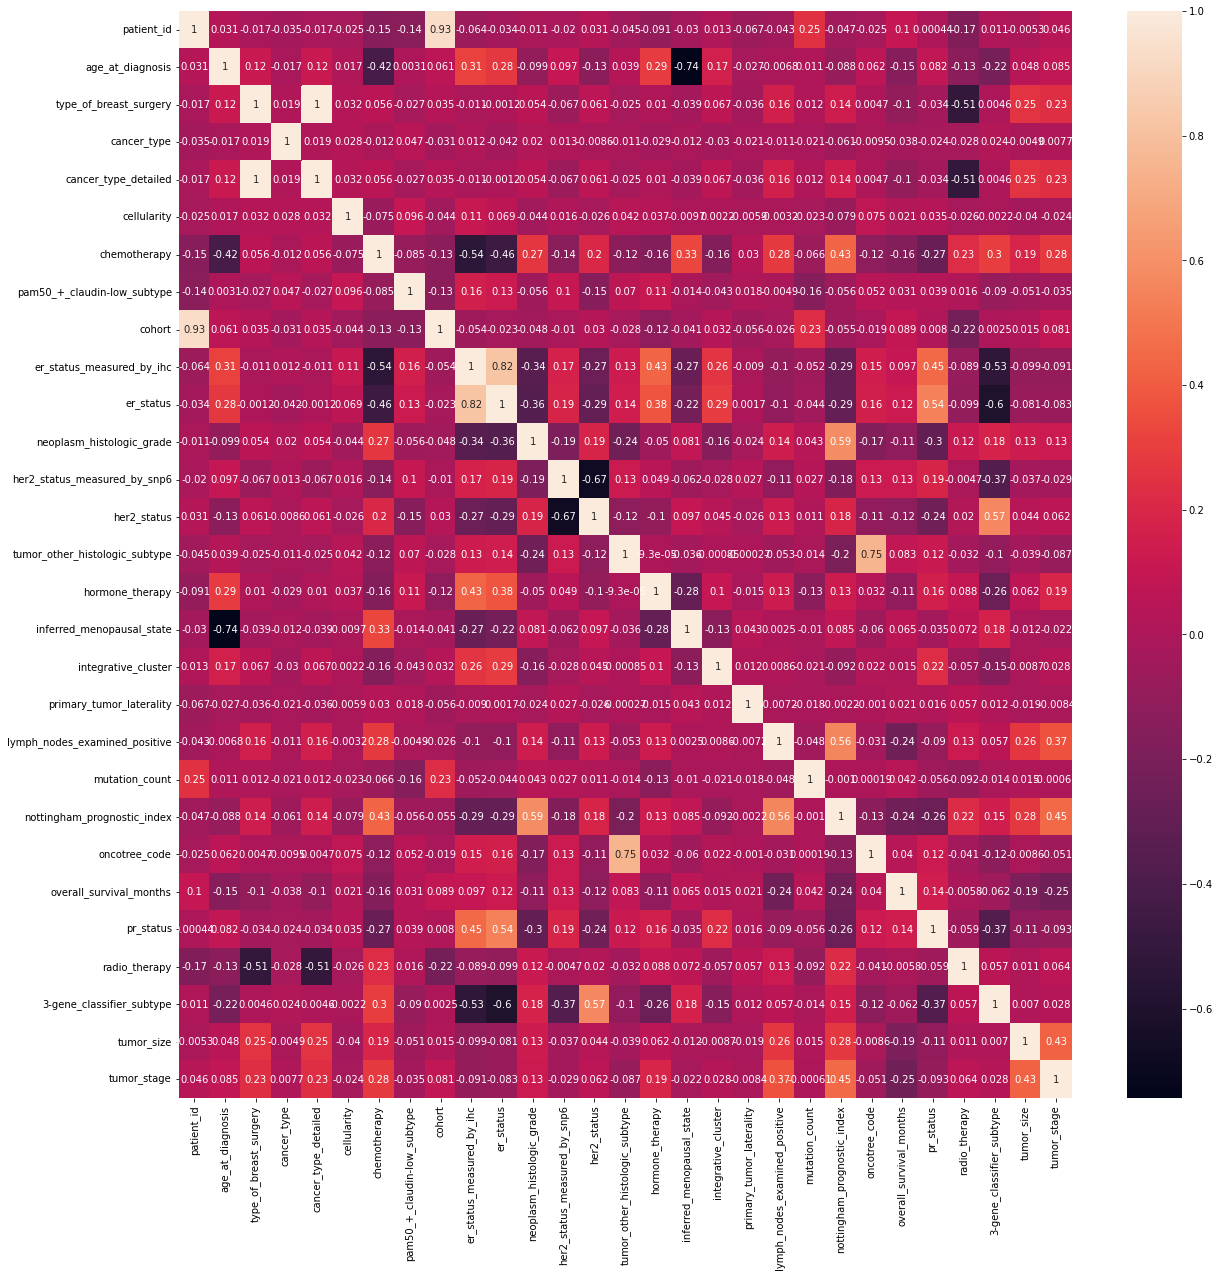

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df_clinical.corr(),cbar=True,annot=True)

Extract X and Y from the dataset:

In [ ]:
X_clinical = df_clinical.values
y = df['overall_survival'].values

We can deduce so many information from the heatmap above. 

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


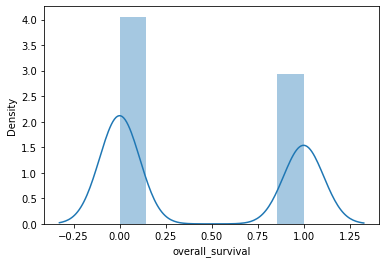

In [ ]:
sns.distplot(df['overall_survival'])

In [ ]:
print("Skewness: ", df['overall_survival'].skew())
print("Kurtosis: ", df['overall_survival'].kurt())

Skewness:  0.32154760730184556
Kurtosis:  -1.8986025717347375


### <font color='GoldenRod'>**EDA for gene_expression dataset**</font> 

We use the same instruction to analyze gene expression and mutation expression datasets.

In [ ]:
# For gene expressions
df_gene_expression.head()

,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
0,-1.3990,-0.5738,-1.6217,1.4524,0.3504,1.1517,0.0348,0.1266,-0.8361,-0.8578,...,-1.1877,-0.0194,-1.6345,-0.2142,-0.5698,-1.1741,-1.4779,-0.5954,-0.8847,-0.3354
1,-1.3800,0.2777,-1.2154,0.5296,-0.0136,-0.2659,1.3594,0.7961,0.5419,-2.6059,...,-0.4412,0.4534,0.4068,0.7634,0.0231,0.9121,-0.9538,-0.2264,0.5398,-0.8920
2,0.0670,-0.8426,0.2114,-0.3326,0.5141,-0.0803,1.1398,0.4187,-0.4030,-1.1305,...,-0.5381,0.0668,0.8344,1.7227,0.4024,-3.7172,-1.5538,1.3701,-0.1078,0.3655
3,0.6744,-0.5428,-1.6592,0.6369,1.6708,-0.8880,1.2491,-1.1889,-0.4174,-0.6165,...,-0.5630,-0.7078,0.8228,0.6819,-0.1948,-2.3286,-0.9924,-0.3154,0.2320,-0.4828
4,1.2932,-0.9039,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,-0.2940,...,-0.5845,-0.3544,-1.0150,2.2961,0.1817,-0.1572,0.0427,5.0048,3.8476,1.3223


In [ ]:
df_gene_expression.shape

(1904, 489)

In [ ]:
df_gene_expression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 489 entries, brca1 to ugt2b7
dtypes: float64(489)
memory usage: 7.1 MB


We can see that there are several null data in df_clinical.

In [ ]:
df_gene_expression.describe()

,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
count,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1904.000000,1.904000e+03,1.904000e+03,1904.000000,...,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1904.000000,1.904000e+03,1.904000e+03,1.904000e+03,1904.000000,1.904000e+03
mean,-6.302521e-07,-4.201681e-07,3.676471e-07,-8.928571e-07,6.302521e-07,-2.100840e-07,0.000002,7.463684e-18,-3.676471e-07,-0.000001,...,4.726891e-07,-3.676471e-07,-9.453782e-07,-1.050420e-07,-0.000002,3.676471e-07,4.726891e-07,7.878151e-07,0.000000,3.731842e-18
std,1.000262e+00,1.000262e+00,1.000263e+00,1.000263e+00,1.000263e+00,1.000262e+00,1.000263,1.000262e+00,1.000263e+00,1.000262,...,1.000263e+00,1.000262e+00,1.000262e+00,1.000263e+00,1.000262,1.000264e+00,1.000262e+00,1.000263e+00,1.000262,1.000262e+00
min,-2.444400e+00,-2.783500e+00,-4.384600e+00,-5.932800e+00,-2.481200e+00,-3.170500e+00,-3.323700,-2.688700e+00,-3.689800e+00,-2.968600,...,-2.120800e+00,-3.364800e+00,-2.719400e+00,-4.982700e+00,-2.981700,-3.833300e+00,-3.609300e+00,-1.166900e+00,-2.112600,-1.051600e+00
25%,-7.198500e-01,-6.994750e-01,-6.798250e-01,-5.586500e-01,-6.661500e-01,-6.602250e-01,-0.458600,-7.385500e-01,-6.667750e-01,-0.683925,...,-6.188500e-01,-6.104750e-01,-6.741750e-01,-6.136750e-01,-0.632900,-6.664750e-01,-7.102000e-01,-5.058250e-01,-0.476200,-7.260000e-01
50%,-1.244500e-01,-5.820000e-02,-2.210000e-02,1.098500e-01,-3.010000e-02,-4.200000e-03,0.115550,-1.311000e-01,-1.445000e-02,-0.054800,...,-2.456500e-01,-4.690000e-02,-1.422500e-01,-5.175000e-02,-0.026650,7.000000e-04,-2.980000e-02,-2.885500e-01,-0.133400,-4.248000e-01
75%,5.532250e-01,6.290000e-01,6.400000e-01,6.426250e-01,6.447500e-01,6.901500e-01,0.649800,5.431250e-01,6.387250e-01,0.668925,...,3.306000e-01,5.144500e-01,5.146000e-01,5.787750e-01,0.590350,6.429000e-01,5.957250e-01,6.022500e-02,0.270375,4.284000e-01
max,4.554200e+00,3.737900e+00,4.615000e+00,3.254100e+00,4.289800e+00,3.824200e+00,2.820900,4.538200e+00,5.371300e+00,6.178600,...,6.534900e+00,1.027030e+01,6.329000e+00,4.571300e+00,12.742300,3.938800e+00,3.833400e+00,1.088490e+01,12.643900,3.284400e+00


Visualizing to check if there are any missing values.

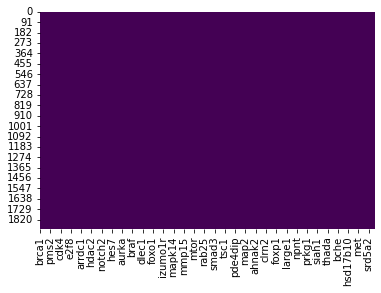

In [ ]:
sns.heatmap(df_gene_expression.isnull(),cbar=False,cmap='viridis')

In [ ]:
df_gene_expression.isnull().sum()

brca1      0
brca2      0
palb2      0
pten       0
tp53       0
          ..
tnk2       0
tulp4      0
ugt2b15    0
ugt2b17    0
ugt2b7     0
Length: 489, dtype: int64

It's obvious that there isn't any missing value here. 

In [ ]:
df_gene_expression = convert_to_dataset(df_gene_expression)

In [ ]:
X_gene_expression = df_gene_expression.values

In [ ]:
X_gene_expression

array([[-1.399 , -0.5738, -1.6217, ..., -0.5954, -0.8847, -0.3354],
       [-1.38  ,  0.2777, -1.2154, ..., -0.2264,  0.5398, -0.892 ],
       [ 0.067 , -0.8426,  0.2114, ...,  1.3701, -0.1078,  0.3655],
       ...,
       [ 1.8107, -0.2608,  0.4006, ..., -0.184 ,  0.0967, -0.6264],
       [-1.2746, -1.7695, -0.3454, ..., -0.4915, -0.2847, -0.8041],
       [-0.7525,  0.7352,  0.6448, ..., -0.2316, -0.2081, -0.4328]])

## Dimension Reduction (20 + Up to 10 Points Optional)

For each dataset, investigate whether it is needed to use a dimensionality reduction approach or not. If yes, please reduce the dataset's dimension. You can use UMAP for this purpose but any other approach is acceptable. Finding the most important features contains extra points.

In [ ]:
!pip install umap-learn
from umap import UMAP

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=abe548cc3694d9eb5d081ce964853fccdede98117736fa48a3270446255cb9b5
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=4070076ccb46f54a10697f0f9638a7df033b8a6ec27119011595ae490c92ba89
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent


### <font color='GoldenRod'>**Dimension reduction for clinical dataset**</font> 

In [ ]:
reducer = UMAP(n_neighbors=100, n_components=6, n_epochs=1000, 
                min_dist=0.5, local_connectivity=2, random_state=42,)

In [ ]:
X_train_clinical, X_test_clinical, y_train_clinical, y_test_clinical = train_test_split(X_clinical, y, test_size=0.25, shuffle=True)

In [ ]:
print(X_train_clinical.shape)
X_train_reduced_clinical = reducer.fit_transform(X_train_clinical, y_train_clinical)
print(X_train_reduced_clinical.shape)

(1428, 29)
(1428, 6)


In [ ]:
print(X_test_clinical.shape)
X_test_reduced_clinical = reducer.transform(X_test_clinical)
print(X_test_reduced_clinical.shape)

(476, 29)
(476, 6)


### <font color='GoldenRod'>**Dimension reduction for gene_expression dataset**</font> 

In [ ]:
reducer_gene = UMAP(n_neighbors=100, n_components=50, n_epochs=1000, 
                min_dist=0.5, local_connectivity=2, random_state=42,)

In [ ]:
X_train_gene_expression, X_test_gene_expression, y_train_gene_expression, y_test_gene_expression = train_test_split(X_gene_expression, y, test_size=0.25, shuffle=True)

In [ ]:
print(X_train_gene_expression.shape)
X_train_reduced_gene_expression = reducer_gene.fit_transform(X_train_gene_expression, y_train_gene_expression)
print(X_train_reduced_gene_expression.shape)

(1428, 489)
(1428, 50)


In [ ]:
print(X_test_gene_expression.shape)
X_test_reduced_gene_expression = reducer_gene.transform(X_test_gene_expression)
print(X_test_reduced_gene_expression.shape)

(476, 489)
(476, 50)


### <font color='GoldenRod'>**Dimension reduction for both of clinical and gene_expression datasets simultaneously**</font> 

In [ ]:
X_overall = np.concatenate((X_clinical, X_gene_expression), axis=1)
X_overall.shape

(1904, 518)

In [ ]:
reducer_whole = UMAP(n_neighbors=100, n_components=40, n_epochs=1000, 
                min_dist=0.5, local_connectivity=2, random_state=42,)

In [ ]:
X_overall.shape

(1904, 518)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_overall, y, test_size=0.25, shuffle=True)

In [ ]:
print(X_train.shape)
X_train_reduced = reducer_whole.fit_transform(X_train, y_train_gene_expression)
print(X_train_reduced.shape)

(1428, 518)
(1428, 40)


In [ ]:
print(X_test.shape)
X_test_reduced = reducer_whole.transform(X_test)
print(X_test_reduced.shape)

(476, 518)
(476, 40)


### <font color='GoldenRod'>**Find important features(optional)**</font> 

#### <font color='Green'>**Find important features for clinical data**</font> 

In [ ]:
# for clinical data
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train_clinical, y_train)
feature_scores = pd.Series(clf.feature_importances_, index=df_clinical.columns).sort_values(ascending=False)
feature_scores

overall_survival_months           0.109875
age_at_diagnosis                  0.103438
patient_id                        0.102132
nottingham_prognostic_index       0.088631
tumor_size                        0.083495
mutation_count                    0.068087
integrative_cluster               0.053715
lymph_nodes_examined_positive     0.042763
pam50_+_claudin-low_subtype       0.037396
cohort                            0.029995
3-gene_classifier_subtype         0.026759
cellularity                       0.024881
tumor_other_histologic_subtype    0.020869
neoplasm_histologic_grade         0.019237
tumor_stage                       0.018194
her2_status_measured_by_snp6      0.018097
primary_tumor_laterality          0.018068
radio_therapy                     0.017573
oncotree_code                     0.016896
pr_status                         0.016024
hormone_therapy                   0.013974
type_of_breast_surgery            0.013081
cancer_type_detailed              0.012588
inferred_me

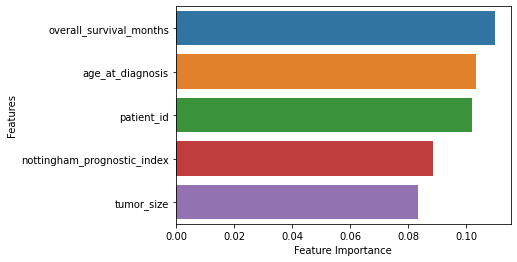

In [ ]:
sns.barplot(x=feature_scores[:5], y=feature_scores[:5].index)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

#### <font color='Green'>**Find important features for gene expression data**</font> 

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train_gene_expression, y_train)
feature_scores = pd.Series(clf.feature_importances_, index=df_gene_expression.columns).sort_values(ascending=False)
feature_scores

magea8    0.004086
inha      0.004022
bmp4      0.003937
mdm2      0.003835
gata3     0.003622
            ...   
afdn      0.000961
e2f5      0.000953
cyb5a     0.000942
ptpn22    0.000905
pik3ca    0.000659
Length: 489, dtype: float64

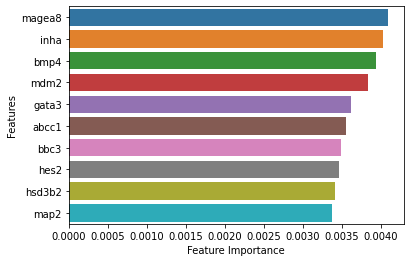

In [ ]:
sns.barplot(x=feature_scores[:10], y=feature_scores[:10].index)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

#### <font color='Green'>**Find important features for all the data**</font> 

In [ ]:
df_new = df.iloc[:,:520]
df_new = df_new.drop('overall_survival', axis=1)
df_new = df_new.drop('death_from_cancer', axis=1)
df_new.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,-1.1877,-0.0194,-1.6345,-0.2142,-0.5698,-1.1741,-1.4779,-0.5954,-0.8847,-0.3354
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,-0.4412,0.4534,0.4068,0.7634,0.0231,0.9121,-0.9538,-0.2264,0.5398,-0.8920
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,-0.5381,0.0668,0.8344,1.7227,0.4024,-3.7172,-1.5538,1.3701,-0.1078,0.3655
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,-0.5630,-0.7078,0.8228,0.6819,-0.1948,-2.3286,-0.9924,-0.3154,0.2320,-0.4828
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,-0.5845,-0.3544,-1.0150,2.2961,0.1817,-0.1572,0.0427,5.0048,3.8476,1.3223


In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
feature_scores = pd.Series(clf.feature_importances_, index=df_new.columns).sort_values(ascending=False)
feature_scores

overall_survival_months        0.033448
age_at_diagnosis               0.027952
nottingham_prognostic_index    0.007064
tumor_size                     0.006104
map4                           0.005923
                                 ...   
cellularity                    0.000138
her2_status                    0.000037
er_status                      0.000026
cancer_type                    0.000000
chemotherapy                   0.000000
Length: 518, dtype: float64

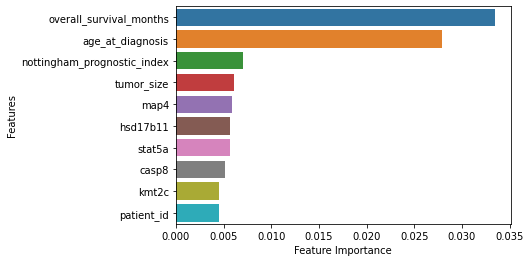

In [ ]:
sns.barplot(x=feature_scores[:10], y=feature_scores[:10].index)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

# Classic Model (25 Points)

In this section, you must implement a classic classification model for clinical, gene expressions, and reduced gene expressions datasets. Using Random Forest is suggested. (minimum acceptable accuracy = 60%)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

### <font color='GoldenRod'>**Train on whole data**</font> 

In [ ]:
rf_model = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=44)
rf_model.fit(X_train, y_train)
accuracy_score(y_test, rf_model.predict(X_test))

0.7247899159663865

In [ ]:
rf_model = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=44)
rf_model.fit(X_train_reduced, y_train)
accuracy_score(y_test, rf_model.predict(X_test_reduced))

0.7289915966386554

### <font color='GoldenRod'>**Train on clinical data**</font> 

In [ ]:
rf_model = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=44)
rf_model.fit(X_train_clinical, y_train_clinical)
accuracy_score(y_test_clinical, rf_model.predict(X_test_clinical))

0.8025210084033614

In [ ]:
rf_model = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=44)
rf_model.fit(X_train_reduced_clinical, y_train_clinical)
accuracy_score(y_test_clinical, rf_model.predict(X_test_reduced_clinical))

0.7647058823529411

### <font color='GoldenRod'>**Train on gene_expression data**</font> 

In [ ]:
rf_model = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=44)
rf_model.fit(X_train_gene_expression, y_train_gene_expression)
accuracy_score(y_test_gene_expression, rf_model.predict(X_test_gene_expression))

0.6323529411764706

In [ ]:
n_estimators = np.linspace(100, 3000, int((3000-100)/200) + 1, dtype=int)
max_features = ['auto', 'sqrt']
max_depth = [1, 5, 10, 20, 50, 75, 100, 150, 200]
min_samples_split = [1, 2, 5, 10, 15, 20, 30]
min_samples_leaf = [1, 2, 3, 4]
bootstrap = [True, False]
criterion=['gini', 'entropy']
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

RF = RandomForestClassifier()
rf_search = RandomizedSearchCV(estimator = RF,
                               param_distributions = random_grid,
                               n_iter = 30, cv = 5,
                               verbose=2,
                               random_state=42, n_jobs = 4)
rf_search.fit(X_train_reduced_gene_expression, y_train_gene_expression)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=30,
                   n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 5, 10, 20, 50, 75, 100,
                                                      150, 200],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 5, 10, 15,
                                                              20, 30],
                                        'n_estimators': array([ 100,  307,  514,  721,  928, 1135, 1342, 1550, 1757, 1964, 2171,
       2378, 2585, 2792, 3000])},
                   random_state=42, verbose=2)

In [ ]:
rf_search.best_params_

{'n_estimators': 2171,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 200,
 'criterion': 'entropy',
 'bootstrap': True}

In [ ]:
rf_model = RandomForestClassifier(n_estimators= 2171,
                                  min_samples_split=2, min_samples_leaf=2,
                                  max_depth=200, criterion='entropy',
                                  bootstrap = True)
rf_model.fit(X_train_reduced_gene_expression, y_train_gene_expression)
accuracy_score(y_test_gene_expression, rf_model.predict(X_test_reduced_gene_expression))

0.6113445378151261

# Neural Network (30 Points)

In this section, you must implement a neural network model for clinical, gene expressions and reduced gene expressions datasets. Using the MLP models is suggested. (minimum acceptable accuracy = 60%)

## <font color='Red'>Define model by using MLPClassifier</font> 

### <font color='GoldenRod'>**Train on whole data**</font> 

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
classifier = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=1000)
classifier.fit(X_train, y_train)
accuracy_score(y_test, classifier.predict(X_test))

0.7352941176470589

In [ ]:
classifier = MLPClassifier(solver='lbfgs', alpha=1e-3, hidden_layer_sizes=(4, 2), random_state=15)
classifier.fit(X_train_reduced, y_train)
accuracy_score(y_test, classifier.predict(X_test_reduced))

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.6428571428571429

### <font color='GoldenRod'>**Train on clinical data**</font> 

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
base = MLPClassifier(hidden_layer_sizes=(5,2),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')
search = GridSearchCV(base, param_grid, n_jobs= -1, cv=5)
search.fit(X_train_clinical, y_train)

print(search.best_params_) 

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.8/dist-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


{'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'adaptive', 'max_iter': 50, 'solver': 'sgd'}


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# clinical data
accuracy_score(y_test, search.predict(X_test_clinical))

0.6071428571428571

In [ ]:
classifier = MLPClassifier(solver='adam', alpha=1e-5,
                           hidden_layer_sizes=(5, 2),
                           random_state=1, max_iter=1000)
classifier.fit(X_train_reduced_clinical, y_train_clinical)
accuracy_score(y_test_clinical, classifier.predict(X_test_reduced_clinical))

0.7373949579831933

### <font color='GoldenRod'>**Train on gene expression data**</font> 

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
base = MLPClassifier(hidden_layer_sizes=(5,2),
                        max_iter = 300, activation = 'relu',
                        solver = 'adam')
search = GridSearchCV(base, param_grid, n_jobs= -1, cv=5)
search.fit(X_train_gene_expression, y_train)

print(search.best_params_) 

{'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'adaptive', 'max_iter': 50, 'solver': 'sgd'}


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
classifier = MLPClassifier(solver='sgd', alpha=0.05,
                           activation = 'tanh', learning_rate = 'adaptive',
                           hidden_layer_sizes=(150, 100, 50), random_state=1)
classifier.fit(X_train_gene_expression, y_train)
accuracy_score(y_test, classifier.predict(X_test_gene_expression))

0.6071428571428571

In [ ]:
# on reduced dimension gene expression data
classifier = MLPClassifier(solver='lbfgs', alpha=1e-4, hidden_layer_sizes=(2, 2), random_state=1)
classifier.fit(X_train_reduced_gene_expression, y_train)
accuracy_score(y_test, classifier.predict(X_test_reduced_gene_expression))


0.6008403361344538

## <font color='Red'>Define model from scratch</font> 

In [ ]:
from sklearn.neural_network import MLPClassifier
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms, datasets
from torch.utils.data import TensorDataset, DataLoader
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [ ]:
class MLP(nn.Module):

  def __init__(self, features_num):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(features_num, 64),
      nn.ReLU(),
      nn.Linear(64, 32),
      nn.ReLU(),
      nn.Linear(32, 16),
      nn.ReLU(),
      nn.Linear(16, 8),
      nn.ReLU(),
      nn.Linear(8, 2)
    )

  def forward(self, x):
    return self.layers(x)

In [ ]:
class MLP_Reduced(nn.Module):

  def __init__(self, features_num):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(features_num, 16),
      nn.ReLU(),
      nn.Linear(16, 8),
      nn.ReLU(),
      nn.Linear(8, 2)
    )

  def forward(self, x):
    return self.layers(x)

In [ ]:
class BioDataset(Dataset):
    def __init__(self, X: np.ndarray, y: np.ndarray):
        self.X = torch.from_numpy(X).type(torch.float32)
        self.y = torch.from_numpy(y).type(torch.LongTensor)

    def __len__(self) -> int:
        return self.X.shape[0]

    def __getitem__(self, i: int):
        return self.X[i], self.y[i]

### <font color='GoldenRod'>**Train on whole data**</font> 

In [ ]:
train_dataset = BioDataset(X_train, y_train)
train_size = int(0.9 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, (train_size, val_size))
test_dataset = BioDataset(X_test, y_test)

In [ ]:
train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=16, shuffle=False)

In [ ]:
model = MLP(X_train.shape[1]).to(device)

criterion = nn.CrossEntropyLoss()
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
num_epochs = 25

train_loss_arr, val_loss_arr = [], []
train_accuracy, val_accuracy = [], [] 
for epoch in range(num_epochs):
    train_loss, val_loss = 0, 0

    model.train()

    epoch_all_train = 0
    epoch_true_train = 0
    epoch_accuracy = 0
    epoch_all_val = 0
    epoch_true_val = 0
    n = 0 
    for i, (x, y) in enumerate(train_loader):
        x = x.to(device)
        y = y.to(device)
        optimizer.zero_grad()
        p = model(x)
        n += len(x)

        batch_loss = criterion(p, y)
        batch_size = p.shape[0]
        train_loss += float(batch_loss.item() * batch_size)

        predictions = p.argmax(-1)
        epoch_all_train += len(predictions)
        epoch_true_train += int((predictions == y).sum())

        batch_loss.backward()

        optimizer.step()
    
    epoch_true_train *= 100.0 / n

  
    n = 0
    model.eval()            
    with torch.no_grad():
      for i, (x, y) in enumerate(val_loader):
        x = x.to(device)
        y = y.to(device)
        p = model(x)
        n += len(x)

        batch_loss = criterion(p, y)
        batch_size = p.shape[0]
        val_loss += float(batch_loss.item() * batch_size)

        predictions = p.argmax(-1)
        epoch_all_val += len(predictions)
        epoch_true_val += int((predictions == y).sum())

    train_loss /= len(train_loader.dataset)
    val_loss /= len(val_loader.dataset)
    epoch_true_val *= 100.0 / n

    train_loss_arr.append(train_loss)
    val_loss_arr.append(val_loss)
    train_accuracy.append(epoch_true_train)
    val_accuracy.append(epoch_true_val)

    print(f"[Epoch {epoch}]\t"
        f"Train Loss: {train_loss:.4f}\t"
        f"Validation Loss: {val_loss:.4f}\t"
        f"Train Accuracy: {epoch_true_train:.2f}\t"
        f"Validation Accuracy: {epoch_true_val:.2f}")

[Epoch 0]	Train Loss: 0.6775	Validation Loss: 0.6330	Train Accuracy: 59.61	Validation Accuracy: 68.53
[Epoch 1]	Train Loss: 0.6495	Validation Loss: 0.6141	Train Accuracy: 63.27	Validation Accuracy: 65.73
[Epoch 2]	Train Loss: 0.6256	Validation Loss: 0.5993	Train Accuracy: 65.76	Validation Accuracy: 66.43
[Epoch 3]	Train Loss: 0.6128	Validation Loss: 0.6389	Train Accuracy: 66.46	Validation Accuracy: 57.34
[Epoch 4]	Train Loss: 0.6011	Validation Loss: 0.5692	Train Accuracy: 66.54	Validation Accuracy: 67.13
[Epoch 5]	Train Loss: 0.5780	Validation Loss: 0.5688	Train Accuracy: 68.40	Validation Accuracy: 68.53
[Epoch 6]	Train Loss: 0.5676	Validation Loss: 0.5333	Train Accuracy: 68.64	Validation Accuracy: 69.93
[Epoch 7]	Train Loss: 0.5448	Validation Loss: 0.5362	Train Accuracy: 70.35	Validation Accuracy: 69.93
[Epoch 8]	Train Loss: 0.5546	Validation Loss: 0.5528	Train Accuracy: 69.96	Validation Accuracy: 69.93
[Epoch 9]	Train Loss: 0.5292	Validation Loss: 0.5130	Train Accuracy: 72.14	Validat

In [ ]:
model.eval()
accuracy = 0.0
total = 0.0
test_loss = 0
predicted_labels = []

with torch.no_grad():
    for data in test_loader:
      images, labels = data
      images = images.to(device)
      labels = labels.to(device)
      outputs = model(images)
      batch_loss = criterion(outputs, labels)
      batch_size = outputs.shape[0]
      test_loss += float(batch_loss.item() * batch_size)
      _, predicted = torch.max(outputs.data, 1)
      for i in range(len(predicted)):
        p = predicted[i].item()
        predicted_labels.append(p)
      total += labels.size(0)
      accuracy += (predicted == labels).sum().item()

test_loss /= len(test_loader.dataset)
print(f"Test Loss: {test_loss:.4f}")
accuracy = (100 * accuracy / total)
print(f"accuracy: {accuracy:.2f}")

Test Loss: 0.5226
accuracy: 73.11


### <font color='GoldenRod'>**Train on Clinical data**</font> 

In [ ]:
X_train_clinical.shape

(1428, 29)

In [ ]:
train_dataset = BioDataset(X_train_clinical, y_train_clinical)
train_size = int(0.9 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, (train_size, val_size))
test_dataset = BioDataset(X_test_clinical, y_test_clinical)

In [ ]:
train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=16, shuffle=False)

In [ ]:
model = MLP_Reduced(X_train_clinical.shape[1]).to(device)

criterion = nn.CrossEntropyLoss()
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
num_epochs = 25

train_loss_arr, val_loss_arr = [], []
train_accuracy, val_accuracy = [], [] 
for epoch in range(num_epochs):
    train_loss, val_loss = 0, 0

    model.train()

    epoch_all_train = 0
    epoch_true_train = 0
    epoch_accuracy = 0
    epoch_all_val = 0
    epoch_true_val = 0
    n = 0 
    for i, (x, y) in enumerate(train_loader):
        x = x.to(device)
        y = y.to(device)
        optimizer.zero_grad()
        p = model(x)
        n += len(x)

        batch_loss = criterion(p, y)
        batch_size = p.shape[0]
        train_loss += float(batch_loss.item() * batch_size)

        predictions = p.argmax(-1)
        epoch_all_train += len(predictions)
        epoch_true_train += int((predictions == y).sum())

        batch_loss.backward()

        optimizer.step()
    
    epoch_true_train *= 100.0 / n

  
    n = 0
    model.eval()            
    with torch.no_grad():
      for i, (x, y) in enumerate(val_loader):
        x = x.to(device)
        y = y.to(device)
        p = model(x)
        n += len(x)

        batch_loss = criterion(p, y)
        batch_size = p.shape[0]
        val_loss += float(batch_loss.item() * batch_size)

        predictions = p.argmax(-1)
        epoch_all_val += len(predictions)
        epoch_true_val += int((predictions == y).sum())

    train_loss /= len(train_loader.dataset)
    val_loss /= len(val_loader.dataset)
    epoch_true_val *= 100.0 / n

    train_loss_arr.append(train_loss)
    val_loss_arr.append(val_loss)
    train_accuracy.append(epoch_true_train)
    val_accuracy.append(epoch_true_val)

    print(f"[Epoch {epoch}]\t"
        f"Train Loss: {train_loss:.4f}\t"
        f"Validation Loss: {val_loss:.4f}\t"
        f"Train Accuracy: {epoch_true_train:.2f}\t"
        f"Validation Accuracy: {epoch_true_val:.2f}")

[Epoch 0]	Train Loss: 38.4691	Validation Loss: 16.7966	Train Accuracy: 58.05	Validation Accuracy: 65.73
[Epoch 1]	Train Loss: 7.4280	Validation Loss: 1.9255	Train Accuracy: 58.29	Validation Accuracy: 61.54
[Epoch 2]	Train Loss: 1.8956	Validation Loss: 1.6564	Train Accuracy: 57.20	Validation Accuracy: 57.34
[Epoch 3]	Train Loss: 1.5951	Validation Loss: 1.5530	Train Accuracy: 52.92	Validation Accuracy: 47.55
[Epoch 4]	Train Loss: 1.4073	Validation Loss: 1.4689	Train Accuracy: 53.15	Validation Accuracy: 62.24
[Epoch 5]	Train Loss: 1.2596	Validation Loss: 1.2255	Train Accuracy: 52.84	Validation Accuracy: 59.44
[Epoch 6]	Train Loss: 1.1658	Validation Loss: 1.1141	Train Accuracy: 50.82	Validation Accuracy: 52.45
[Epoch 7]	Train Loss: 1.0677	Validation Loss: 1.0133	Train Accuracy: 51.21	Validation Accuracy: 48.95
[Epoch 8]	Train Loss: 0.9699	Validation Loss: 0.9355	Train Accuracy: 53.00	Validation Accuracy: 48.95
[Epoch 9]	Train Loss: 1.0060	Validation Loss: 0.9251	Train Accuracy: 54.16	Valid

In [ ]:
model.eval()
accuracy = 0.0
total = 0.0
test_loss = 0
predicted_labels = []

with torch.no_grad():
    for data in test_loader:
      images, labels = data
      images = images.to(device)
      labels = labels.to(device)
      outputs = model(images)
      batch_loss = criterion(outputs, labels)
      batch_size = outputs.shape[0]
      test_loss += float(batch_loss.item() * batch_size)
      _, predicted = torch.max(outputs.data, 1)
      for i in range(len(predicted)):
        p = predicted[i].item()
        predicted_labels.append(p)
      total += labels.size(0)
      accuracy += (predicted == labels).sum().item()

test_loss /= len(test_loader.dataset)
print(f"Test Loss: {test_loss:.4f}")
accuracy = (100 * accuracy / total)
print(f"accuracy: {accuracy:.2f}")

Test Loss: 0.5461
accuracy: 71.85


### <font color='GoldenRod'>**Train on gene expression data**</font> 

In [ ]:
X_train_gene_expression.shape[1]

489

In [ ]:
train_dataset = BioDataset(X_train_gene_expression, y_train_gene_expression)
train_size = int(0.9 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, (train_size, val_size))
test_dataset = BioDataset(X_test_gene_expression, y_test_gene_expression)

In [ ]:
train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=16, shuffle=False)

In [ ]:
model = MLP_Reduced(X_train_gene_expression.shape[1]).to(device)

criterion = nn.CrossEntropyLoss()
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
num_epochs = 20

train_loss_arr, val_loss_arr = [], []
train_accuracy, val_accuracy = [], [] 
for epoch in range(num_epochs):
    train_loss, val_loss = 0, 0

    model.train()

    epoch_all_train = 0
    epoch_true_train = 0
    epoch_accuracy = 0
    epoch_all_val = 0
    epoch_true_val = 0
    n = 0 
    for i, (x, y) in enumerate(train_loader):
        x = x.to(device)
        y = y.to(device)
        optimizer.zero_grad()
        p = model(x)
        n += len(x)

        batch_loss = criterion(p, y)
        batch_size = p.shape[0]
        train_loss += float(batch_loss.item() * batch_size)

        predictions = p.argmax(-1)
        epoch_all_train += len(predictions)
        epoch_true_train += int((predictions == y).sum())

        batch_loss.backward()

        optimizer.step()
    
    epoch_true_train *= 100.0 / n

  
    n = 0
    model.eval()            
    with torch.no_grad():
      for i, (x, y) in enumerate(val_loader):
        x = x.to(device)
        y = y.to(device)
        p = model(x)
        n += len(x)

        batch_loss = criterion(p, y)
        batch_size = p.shape[0]
        val_loss += float(batch_loss.item() * batch_size)

        predictions = p.argmax(-1)
        epoch_all_val += len(predictions)
        epoch_true_val += int((predictions == y).sum())

    train_loss /= len(train_loader.dataset)
    val_loss /= len(val_loader.dataset)
    epoch_true_val *= 100.0 / n

    train_loss_arr.append(train_loss)
    val_loss_arr.append(val_loss)
    train_accuracy.append(epoch_true_train)
    val_accuracy.append(epoch_true_val)

    print(f"[Epoch {epoch}]\t"
        f"Train Loss: {train_loss:.4f}\t"
        f"Validation Loss: {val_loss:.4f}\t"
        f"Train Accuracy: {epoch_true_train:.2f}\t"
        f"Validation Accuracy: {epoch_true_val:.2f}")

[Epoch 0]	Train Loss: 0.7227	Validation Loss: 0.7129	Train Accuracy: 42.96	Validation Accuracy: 45.45
[Epoch 1]	Train Loss: 0.7015	Validation Loss: 0.6989	Train Accuracy: 48.02	Validation Accuracy: 51.75
[Epoch 2]	Train Loss: 0.6826	Validation Loss: 0.6875	Train Accuracy: 52.53	Validation Accuracy: 54.55
[Epoch 3]	Train Loss: 0.6661	Validation Loss: 0.6778	Train Accuracy: 57.51	Validation Accuracy: 57.34
[Epoch 4]	Train Loss: 0.6516	Validation Loss: 0.6691	Train Accuracy: 62.10	Validation Accuracy: 61.54
[Epoch 5]	Train Loss: 0.6383	Validation Loss: 0.6610	Train Accuracy: 64.28	Validation Accuracy: 65.03
[Epoch 6]	Train Loss: 0.6274	Validation Loss: 0.6534	Train Accuracy: 66.69	Validation Accuracy: 66.43
[Epoch 7]	Train Loss: 0.6172	Validation Loss: 0.6476	Train Accuracy: 68.33	Validation Accuracy: 67.83
[Epoch 8]	Train Loss: 0.6075	Validation Loss: 0.6429	Train Accuracy: 69.65	Validation Accuracy: 67.83
[Epoch 9]	Train Loss: 0.5988	Validation Loss: 0.6375	Train Accuracy: 70.19	Validat

In [ ]:
model.eval()
accuracy = 0.0
total = 0.0
test_loss = 0
predicted_labels = []

with torch.no_grad():
    for data in test_loader:
      images, labels = data
      images = images.to(device)
      labels = labels.to(device)
      outputs = model(images)
      batch_loss = criterion(outputs, labels)
      batch_size = outputs.shape[0]
      test_loss += float(batch_loss.item() * batch_size)
      _, predicted = torch.max(outputs.data, 1)
      for i in range(len(predicted)):
        p = predicted[i].item()
        predicted_labels.append(p)
      total += labels.size(0)
      accuracy += (predicted == labels).sum().item()

test_loss /= len(test_loader.dataset)
print(f"Test Loss: {test_loss:.4f}")
accuracy = (100 * accuracy / total)
print(f"accuracy: {accuracy:.2f}")

Test Loss: 0.6520
accuracy: 63.45


### <font color='GoldenRod'>**Train on reduced gene expression data**</font> 

In [ ]:
X_train_reduced_gene_expression.shape[1]

60

In [ ]:
class MLP_Reduced_2(nn.Module):

  def __init__(self, features_num):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(features_num, 16),
      nn.ReLU(),
      nn.Linear(16, 8),
      nn.ReLU(),
      nn.Linear(8, 2)
    )

  def forward(self, x):
    return self.layers(x)

In [ ]:
train_dataset = BioDataset(X_train_reduced_gene_expression, y_train_gene_expression)
train_size = int(0.9 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, (train_size, val_size))
test_dataset = BioDataset(X_train_reduced_gene_expression, y_test_gene_expression)

In [ ]:
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

In [ ]:
model = MLP_Reduced_2(X_train_gene_expression.shape[1]).to(device)

criterion = nn.CrossEntropyLoss()
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
num_epochs = 25

train_loss_arr, val_loss_arr = [], []
train_accuracy, val_accuracy = [], [] 
for epoch in range(num_epochs):
    train_loss, val_loss = 0, 0

    model.train()

    epoch_all_train = 0
    epoch_true_train = 0
    epoch_accuracy = 0
    epoch_all_val = 0
    epoch_true_val = 0
    n = 0 
    for i, (x, y) in enumerate(train_loader):
        x = x.to(device)
        y = y.to(device)
        optimizer.zero_grad()
        p = model(x)
        n += len(x)

        batch_loss = criterion(p, y)
        batch_size = p.shape[0]
        train_loss += float(batch_loss.item() * batch_size)

        predictions = p.argmax(-1)
        epoch_all_train += len(predictions)
        epoch_true_train += int((predictions == y).sum())

        batch_loss.backward()

        optimizer.step()
    
    epoch_true_train *= 100.0 / n

  
    n = 0
    model.eval()            
    with torch.no_grad():
      for i, (x, y) in enumerate(val_loader):
        x = x.to(device)
        y = y.to(device)
        p = model(x)
        n += len(x)

        batch_loss = criterion(p, y)
        batch_size = p.shape[0]
        val_loss += float(batch_loss.item() * batch_size)

        predictions = p.argmax(-1)
        epoch_all_val += len(predictions)
        epoch_true_val += int((predictions == y).sum())

    train_loss /= len(train_loader.dataset)
    val_loss /= len(val_loader.dataset)
    epoch_true_val *= 100.0 / n

    train_loss_arr.append(train_loss)
    val_loss_arr.append(val_loss)
    train_accuracy.append(epoch_true_train)
    val_accuracy.append(epoch_true_val)

    print(f"[Epoch {epoch}]\t"
        f"Train Loss: {train_loss:.4f}\t"
        f"Validation Loss: {val_loss:.4f}\t"
        f"Train Accuracy: {epoch_true_train:.2f}\t"
        f"Validation Accuracy: {epoch_true_val:.2f}")

[Epoch 0]	Train Loss: 0.6865	Validation Loss: 0.6773	Train Accuracy: 56.81	Validation Accuracy: 63.64
[Epoch 1]	Train Loss: 0.6838	Validation Loss: 0.6767	Train Accuracy: 57.04	Validation Accuracy: 62.24
[Epoch 2]	Train Loss: 0.6815	Validation Loss: 0.6758	Train Accuracy: 57.74	Validation Accuracy: 62.24
[Epoch 3]	Train Loss: 0.6790	Validation Loss: 0.6750	Train Accuracy: 59.46	Validation Accuracy: 63.64
[Epoch 4]	Train Loss: 0.6758	Validation Loss: 0.6736	Train Accuracy: 61.87	Validation Accuracy: 63.64
[Epoch 5]	Train Loss: 0.6722	Validation Loss: 0.6716	Train Accuracy: 63.11	Validation Accuracy: 65.03
[Epoch 6]	Train Loss: 0.6681	Validation Loss: 0.6695	Train Accuracy: 64.82	Validation Accuracy: 65.03
[Epoch 7]	Train Loss: 0.6633	Validation Loss: 0.6668	Train Accuracy: 65.37	Validation Accuracy: 66.43
[Epoch 8]	Train Loss: 0.6576	Validation Loss: 0.6630	Train Accuracy: 66.77	Validation Accuracy: 67.13
[Epoch 9]	Train Loss: 0.6508	Validation Loss: 0.6581	Train Accuracy: 66.77	Validat

In [ ]:
model.eval()
accuracy = 0.0
total = 0.0
test_loss = 0
predicted_labels = []

with torch.no_grad():
    for data in test_loader:
      images, labels = data
      images = images.to(device)
      labels = labels.to(device)
      outputs = model(images)
      batch_loss = criterion(outputs, labels)
      batch_size = outputs.shape[0]
      test_loss += float(batch_loss.item() * batch_size)
      _, predicted = torch.max(outputs.data, 1)
      for i in range(len(predicted)):
        p = predicted[i].item()
        predicted_labels.append(p)
      total += labels.size(0)
      accuracy += (predicted == labels).sum().item()

test_loss /= len(test_loader.dataset)
print(f"Test Loss: {test_loss:.4f}")
accuracy = (100 * accuracy / total)
print(f"accuracy: {accuracy:.2f}")

Test Loss: 0.6387
accuracy: 61.76


# Model Comparison (10 Points)

Compare different models and different datasets (clinical, gene expressions, and gene reduced expressions) and try to explain their differences.

<font color='FireBrick'> Actually the clinical data has the most informative features. We can see this matter by just finding the most important features(as it was calculated and found in the code). They mostly are related to clinical dataset columns. However some of the most important features are related to gene expression data; thus the combination of these two works better than each of them individually. According to the last section, by using NN models we reach better accuracy for the joint of clinical and gene expression data. Next we can see that clinical data works worse than the joint data and better than gene expression data per se. As we expected, gene reduced expression data has the worst accuracy, because every one of the gene expressions has a small proportion of the whole information and by reducing its features, we lose some of the information, thus; we reach lower accuracies. </font>


<font color='FireBrick'> On the other hand, in this problem, Classic models(in this problem we used RandomForest) perform better on our data than NN models! RandomForest has fewer parameters and is less computationally expensive. Also NN models need so much more data than RandomForests which shows their difference in performance on reduced data.